In [1]:
# Dependencies
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt

# OMDB API Key
from config import api_key

In [2]:
#import csv
movies_df = pd.read_csv("Resources/MovieData.csv")
movies_df.head(40)

,movie_name,production_year,movie_odid,production_budget,domestic_box_office,international_box_office,rating,creative_type,source,production_method,genre,sequel,running_time
0,Madea's Family Reunion,2006,8220100,10000000,63257940,62581,PG-13,Contemporary Fiction,Based on Play,Live Action,Comedy,1.0,NaN
1,Krrish,2006,58540100,10000000,1430721,31000000,Not Rated,Science Fiction,Original Screenplay,Live Action,Action,1.0,NaN
2,End of the Spear,2006,34620100,10000000,11748661,175380,PG-13,Historical Fiction,Original Screenplay,Live Action,Drama,0.0,NaN
3,A Prairie Home Companion,2006,24910100,10000000,20342852,6373339,PG-13,Contemporary Fiction,Original Screenplay,Live Action,Comedy,0.0,105.0
4,Saw III,2006,5840100,10000000,80238724,83638091,R,Contemporary Fiction,Original Screenplay,Live Action,Horror,1.0,NaN
5,Employee of the Month,2006,19540100,10000000,28444855,9920000,PG-13,Contemporary Fiction,Original Screenplay,Live Action,Comedy,0.0,108.0
6,Edmond,2006,78520100,10000000,131719,110000,R,Contemporary Fiction,Based on Play,Live Action,Black Comedy,0.0,NaN
7,Peaceful Warrior,2006,52640100,10000000,2893666,366513,PG-13,Dramatization,Based on Fiction Book/Short Story,Live Action,Drama,0.0,NaN
8,Turistas,2006,42200100,10000000,7027762,7293308,R,Contemporary Fiction,Original Screenplay,Live Action,Thriller/Suspense,0.0,NaN
9,Kabhi Alvida Naa Kehna,2006,51280100,10750000,3275443,29300000,Not Rated,Contemporary Fiction,Original Screenplay,Live Action,Drama,0.0,NaN


In [8]:
#adding columns to dataframe for Total Box Office & ROI

#set variables for calculations, add columns to dataFrame
total_box_office = movies_df["domestic_box_office"] + movies_df["international_box_office"]
movies_df['Total Box Office'] = total_box_office
return_on_investment = movies_df['Total Box Office'] / movies_df['production_budget'] *100
movies_df['ROI'] = (return_on_investment).map("{0:.2f}%".format)


movies_df


,movie_name,production_year,movie_odid,production_budget,domestic_box_office,international_box_office,rating,creative_type,source,production_method,genre,sequel,running_time,Total Box Office,ROI
0,Madea's Family Reunion,2006,8220100,10000000,63257940,62581,PG-13,Contemporary Fiction,Based on Play,Live Action,Comedy,1.0,NaN,63320521,633.21%
1,Krrish,2006,58540100,10000000,1430721,31000000,Not Rated,Science Fiction,Original Screenplay,Live Action,Action,1.0,NaN,32430721,324.31%
2,End of the Spear,2006,34620100,10000000,11748661,175380,PG-13,Historical Fiction,Original Screenplay,Live Action,Drama,0.0,NaN,11924041,119.24%
3,A Prairie Home Companion,2006,24910100,10000000,20342852,6373339,PG-13,Contemporary Fiction,Original Screenplay,Live Action,Comedy,0.0,105.0,26716191,267.16%
4,Saw III,2006,5840100,10000000,80238724,83638091,R,Contemporary Fiction,Original Screenplay,Live Action,Horror,1.0,NaN,163876815,1638.77%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1931,The Nutcracker and the Four Realms,2018,298170100,132900000,54858851,115435048,PG,Fantasy,Based on Folk Tale/Legend/Fairytale,Live Action,Adventure,0.0,99.0,170293899,128.14%
1932,Aquaman,2018,213100100,160000000,333804251,805605026,PG-13,Super Hero,Based on Comic/Graphic Novel,Live Action,Action,0.0,143.0,1139409277,712.13%
1933,Ralph Breaks The Internet,2018,263730100,175000000,200236625,319167373,PG,Kids Fiction,Original Screenplay,Digital Animation,Adventure,1.0,112.0,519403998,296.80%
1934,Mission: Impossible—Fallout,2018,248680100,178000000,220159104,567297448,PG-13,Contemporary Fiction,Based on TV,Live Action,Action,1.0,147.0,787456552,442.39%


In [4]:
#test for sample api

base_url = "http://www.omdbapi.com/?apikey=" + api_key + "&t=" 
samp_movie_name = requests.get(base_url +"Aquaman").json()
samp_movie_name



{'Title': 'Aquaman',
 'Year': '2018',
 'Rated': 'PG-13',
 'Released': '21 Dec 2018',
 'Runtime': '143 min',
 'Genre': 'Action, Adventure, Fantasy, Sci-Fi',
 'Director': 'James Wan',
 'Writer': 'David Leslie Johnson-McGoldrick (screenplay by), Will Beall (screenplay by), Geoff Johns (story by), James Wan (story by), Will Beall (story by), Paul Norris (Aquaman created by), Mort Weisinger (Aquaman created by)',
 'Actors': 'Jason Momoa, Amber Heard, Willem Dafoe, Patrick Wilson',
 'Plot': 'Arthur Curry, the human-born heir to the underwater kingdom of Atlantis, goes on a quest to prevent a war between the worlds of ocean and land.',
 'Language': 'English, Russian, Maori, Italian',
 'Country': 'USA, Australia',
 'Awards': '2 wins & 39 nominations.',
 'Poster': 'https://m.media-amazon.com/images/M/MV5BOTk5ODg0OTU5M15BMl5BanBnXkFtZTgwMDQ3MDY3NjM@._V1_SX300.jpg',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '6.9/10'},
  {'Source': 'Rotten Tomatoes', 'Value': '65%'},
  {'Source':

In [5]:
#test for api value pull
print(samp_movie_name["Released"])
print(samp_movie_name["Ratings"][1]["Value"])


21 Dec 2018
65%


In [9]:
#convert column to list for api value pull 
movie_names = movies_df.movie_name.to_list()
print(movie_names)

["Madea's Family Reunion", 'Krrish', 'End of the Spear', 'A Prairie Home Companion', 'Saw III', 'Employee of the Month', 'Edmond', 'Peaceful Warrior', 'Turistas', 'Kabhi Alvida Naa Kehna', 'Jackass: Number Two', 'Copying Beethoven', 'For Your Consideration', 'Crank', 'Fateless', 'Running With Scissors', 'Step Up', 'Find Me Guilty', 'Infamous', 'Letters from Iwo Jima', 'Little Children', 'Catch a Fire', 'Bobby', 'An American Haunting', 'Manderlay', 'Idlewild', 'The Marine', 'The Queen', 'Flicka', 'Hoot', 'When a Stranger Calls', 'Slither', 'El Laberinto del Fauno', 'The Texas Chainsaw Massacre: The Beginning', 'The Illusionist', 'FUR: An Imaginary Portrait of Diane Arbus', 'The Hills Have Eyes', 'American Dreamz', 'Larry the Cable Guy: Health Inspector', 'ATL', 'Running Scared', 'Beerfest', 'United 93', 'Borat', 'Renaissance', 'Indigènes', 'The Painted Veil', 'Doogal', 'The Proposition', 'Stay Alive', 'One Night with the King', 'School for Scoundrels', 'Date Movie', 'The Covenant', 'Sti

In [10]:
#check for correct length of rows
print(len(movie_names))

1936


In [11]:
#test for api loop data
url = "http://www.omdbapi.com/?apikey=" + api_key + "&t="

responses = []

for movie in movie_names:
    movie_data = requests.get(url + movie).json()

    responses.append(movie_data)
    
    print(f'{movie} is {movie_data["Released"]}')


Madea's Family Reunion is 24 Feb 2006
Krrish is 23 Jun 2006
End of the Spear is 20 Jan 2006
A Prairie Home Companion is 09 Jun 2006
Saw III is 27 Oct 2006
Employee of the Month is 06 Oct 2006
Edmond is 24 Nov 2006
Peaceful Warrior is 23 Jun 2006
Turistas is 01 Dec 2006
Kabhi Alvida Naa Kehna is 11 Aug 2006
Jackass: Number Two is 22 Sep 2006
Copying Beethoven is 08 Mar 2007
For Your Consideration is 22 Nov 2006
Crank is 01 Sep 2006
Fateless is 10 Feb 2005
Running With Scissors is 27 Oct 2006
Step Up is 11 Aug 2006
Find Me Guilty is 17 Mar 2006
Infamous is 13 Oct 2006
Letters from Iwo Jima is 02 Feb 2007
Little Children is 09 Feb 2007
Catch a Fire is 27 Oct 2006
Bobby is 23 Nov 2006
An American Haunting is 05 May 2006
Manderlay is 03 Jun 2005
Idlewild is 25 Aug 2006
The Marine is 13 Oct 2006
The Queen is 17 Nov 2006
Flicka is 20 Oct 2006
Hoot is 05 May 2006
When a Stranger Calls is 03 Feb 2006
Slither is 31 Mar 2006


KeyError: 'Released'

In [12]:

url = "http://www.omdbapi.com/?apikey=" + api_key + "&t="

# set list variable for values to pull from api
responses = []
countries = []
date_release = []
production_company = []
imdbRating = []
metascore = []
rotten_tomatoes = []

#create for loop
for movie in movie_names:
    movie_data = requests.get(url + movie).json()
    
    #append data values from api
    try:
        responses.append(movie_data['Title'])
        countries.append(movie_data['Country'])
        date_release.append(movie_data['Released'])
        production_company.append(movie_data['Production'])
        imdbRating.append(movie_data['imdbRating'])
        metascore.append(movie_data['Metascore'])
        rotten_tomatoes.append(movie_data["Ratings"][1]["Value"])
        print(f"{movie} found! Appending stats")
        
    #account for null values        
    except:
        
        print(f"{movie} not found! NaN")
        pass

#NaN values are mostly showing up for foreign films, the others are mostly typos [ex. and, &] within film name
#until the end which shows NaN for mostly all, this could be due to having reached pull limit in api
#make sure to hit the stop button when running this after a few hundred values are pulled 
#or you won't be able to see sample of data

Madea's Family Reunion found! Appending stats
Krrish found! Appending stats
End of the Spear found! Appending stats
A Prairie Home Companion found! Appending stats
Saw III found! Appending stats
Employee of the Month found! Appending stats
Edmond found! Appending stats
Peaceful Warrior found! Appending stats
Turistas found! Appending stats
Kabhi Alvida Naa Kehna found! Appending stats
Jackass: Number Two found! Appending stats
Copying Beethoven found! Appending stats
For Your Consideration found! Appending stats
Crank found! Appending stats
Fateless found! Appending stats
Running With Scissors found! Appending stats
Step Up found! Appending stats
Find Me Guilty found! Appending stats
Infamous found! Appending stats
Letters from Iwo Jima found! Appending stats
Little Children found! Appending stats
Catch a Fire found! Appending stats
Bobby found! Appending stats
An American Haunting found! Appending stats
Manderlay found! Appending stats
Idlewild found! Appending stats
The Marine found!

Georgia Rule found! Appending stats
The Kite Runner found! Appending stats
I’m Not There not found! NaN
Death Sentence found! Appending stats
Epic Movie found! Appending stats
Premonition found! Appending stats
Death at a Funeral found! Appending stats
Freedom Writers found! Appending stats
Michael Clayton found! Appending stats
Molière found! Appending stats
The Game Plan found! Appending stats
Zwartboek not found! NaN
1408 found! Appending stats
In the Valley of Elah found! Appending stats
Flood found! Appending stats
Hitman found! Appending stats
War found! Appending stats
Mr. Bean’s Holiday found! Appending stats
Good Luck Chuck found! Appending stats
Hot Rod found! Appending stats
August Rush found! Appending stats
No Country for Old Men found! Appending stats
There Will Be Blood found! Appending stats
The Hoax found! Appending stats
Bridge to Terabithia found! Appending stats
Martian Child found! Appending stats
Knocked Up found! Appending stats
Rendition found! Appending stats
A

Twilight found! Appending stats
Nim's Island found! Appending stats
The Express found! Appending stats
City of Ember found! Appending stats
Delgo found! Appending stats
Made of Honor found! Appending stats
Red Cliff found! Appending stats
Transporter 3 found! Appending stats
Drillbit Taylor found! Appending stats
Soul Men found! Appending stats
The Other Boleyn Girl found! Appending stats
Vantage Point found! Appending stats
Bangkok Dangerous found! Appending stats
Revolutionary Road found! Appending stats
Miracle at St. Anna found! Appending stats
Babylon A.D. found! Appending stats
Journey to the Center of the Earth found! Appending stats
Rambo found! Appending stats
Defiance found! Appending stats
Yes Man found! Appending stats
Mamma Mia! found! Appending stats
Seven Pounds found! Appending stats
Semi-Pro found! Appending stats
The Forbidden Kingdom found! Appending stats
Changeling found! Appending stats
Sex and the City found! Appending stats
Leatherheads found! Appending stats
Ch

Did You Hear About the Morgans? found! Appending stats
The Soloist found! Appending stats
Year One found! Appending stats
State of Play found! Appending stats
Duplicity found! Appending stats
Inkheart found! Appending stats
Planet 51 found! Appending stats
Couples Retreat found! Appending stats
Michael Jackson's This Is It not found! NaN
Invictus found! Appending stats
Coraline found! Appending stats
Astro Boy found! Appending stats
Alvin and the Chipmunks: The Squeakquel found! Appending stats
Agora found! Appending stats
Inglourious Basterds found! Appending stats
Funny People found! Appending stats
Killers found! Appending stats
Surrogates found! Appending stats
Shutter Island found! Appending stats
Nine found! Appending stats
It’s Complicated found! Appending stats
Fast & Furious found! Appending stats
Ice Age: Dawn of the Dinosaurs found! Appending stats
Sherlock Holmes found! Appending stats
The Lovely Bones found! Appending stats
Cloudy with a Chance of Meatballs found! Appendin

Ghost Rider: Spirit of Vengeance found! Appending stats
Resident Evil: Afterlife found! Appending stats
Red found! Appending stats
Eat Pray Love found! Appending stats
Priest found! Appending stats
Edge of Darkness found! Appending stats
Hop found! Appending stats
Red Dawn found! Appending stats
Due Date found! Appending stats
Hall Pass found! Appending stats
The Twilight Saga: Eclipse found! Appending stats
Dinner for Schmucks found! Appending stats
Despicable Me found! Appending stats
Wall Street 2: Money Never Sleeps not found! NaN
Battle: Los Angeles found! Appending stats
The Dilemma found! Appending stats
Grown Ups found! Appending stats
Just Go With It found! Appending stats
Oceans found! Appending stats
Yogi Bear found! Appending stats
The Book of Eli found! Appending stats
Zookeeper found! Appending stats
The Expendables found! Appending stats
Scott Pilgrim vs. The World found! Appending stats
Cats & Dogs: The Revenge of Kitty Galore found! Appending stats
Conan the Barbarian 

The Smurfs found! Appending stats
Life of Pi found! Appending stats
Sherlock Holmes: A Game of Shadows found! Appending stats
Fast Five found! Appending stats
Harry Potter and the Deathly Hallows: Part II not found! NaN
Prometheus found! Appending stats
The Bourne Legacy found! Appending stats
The Twilight Saga: Breaking Dawn, Part 1 found! Appending stats
R.I.P.D. found! Appending stats
Puss in Boots found! Appending stats
The Adventures of Tintin found! Appending stats
Happy Feet Two found! Appending stats
Rango found! Appending stats
Captain America: The First Avenger found! Appending stats
Mission: Impossible—Ghost Protocol found! Appending stats
Thor found! Appending stats
Kung Fu Panda 2 found! Appending stats
Dark Shadows found! Appending stats
X-Men: First Class found! Appending stats
Cowboys and Aliens not found! NaN
Snow White and the Huntsman found! Appending stats
Edge of Tomorrow found! Appending stats
Hugo found! Appending stats
World War Z found! Appending stats
Transfor

Snowpiercer found! Appending stats
Fifty Shades of Grey found! Appending stats
American Hustle found! Appending stats
The Heat found! Appending stats
Prisoners found! Appending stats
Disney Planes not found! NaN
Non-Stop found! Appending stats
Captain Phillips found! Appending stats
Free Birds found! Appending stats
Muppets Most Wanted found! Appending stats
The Internship found! Appending stats
Jack Ryan: Shadow Recruit found! Appending stats
Winter's Tale found! Appending stats
The Lego Movie found! Appending stats
The Mortal Instruments: City of Bones found! Appending stats
Olympus Has Fallen found! Appending stats
The Monuments Men found! Appending stats
Legends of Oz: Dorothy’s Return found! Appending stats
The Legend of Hercules found! Appending stats
Now You See Me found! Appending stats
Despicable Me 2 found! Appending stats
Cloudy with a Chance of Meatballs 2 found! Appending stats
RED 2 found! Appending stats
Percy Jackson: Sea of Monsters found! Appending stats
Alvin and the

Youth found! Appending stats
Room found! Appending stats
Robinson Crusoe found! Appending stats
The Vatican Tapes found! Appending stats
Woodlawn found! Appending stats
Magic Mike XXL found! Appending stats
Krampus found! Appending stats
Scouts Guide to the Zombie Apocalypse found! Appending stats
Cìkè Niè Yinniáng not found! NaN
The Disappointments Room found! Appending stats
In Dubious Battle found! Appending stats
Chiamatemi Francesco - Il papa della gente not found! NaN
Bleed for This found! Appending stats
The Young Messiah found! Appending stats
Genius found! Appending stats
Midnight Special found! Appending stats
Love the Coopers found! Appending stats
Norm of the North found! Appending stats
The Perfect Guy found! Appending stats
Ricki and the Flash found! Appending stats
My Big Fat Greek Wedding 2 found! Appending stats
Risen found! Appending stats
Barbershop: The Next Cut found! Appending stats
Spotlight found! Appending stats
Regression found! Appending stats
Triple 9 found!

The Nut Job 2: Nutty by Nature found! Appending stats
Resident Evil: The Final Chapter found! Appending stats
The Commuter found! Appending stats
A Monster Calls found! Appending stats
All Eyez on Me found! Appending stats
The Girl on the Train found! Appending stats
Office Christmas Party found! Appending stats
Silence found! Appending stats
Arrival found! Appending stats
The Infiltrator found! Appending stats
Central Intelligence found! Appending stats
Fifty Shades Darker found! Appending stats
Kubo and the Two Strings found! Appending stats
Life found! Appending stats
Rock Dog found! Appending stats
Sully found! Appending stats
Jack Reacher: Never Go Back found! Appending stats
Smurfs: The Lost Village found! Appending stats
Mei Ren Yu not found! NaN
American Assassin found! Appending stats
Pete’s Dragon found! Appending stats
The Finest Hours found! Appending stats
The Lego Ninjago Movie found! Appending stats
Storks found! Appending stats
Inferno found! Appending stats
Sing found!

Smallfoot found! Appending stats
Spider-Man: Into The Spider-Verse 3D not found! NaN
The LEGO Movie 2: The Second Part found! Appending stats
Robin Hood found! Appending stats
Mortal Engines found! Appending stats
Venom found! Appending stats
How to Train Your Dragon: The Hidden World found! Appending stats
Mary Poppins Returns found! Appending stats
The Nutcracker and the Four Realms found! Appending stats
Aquaman found! Appending stats
Ralph Breaks The Internet found! Appending stats
Mission: Impossible—Fallout found! Appending stats
Fantastic Beasts: The Crimes of Grindelwald found! Appending stats


In [ ]:
#check length of arrays
print(len(metascore))
print(len(production_company))
print(len(rotten_tomatoes))

In [49]:
#api df
api_data = pd.DataFrame({
    'movie_name' : pd.Series(responses),
    'Country' : pd.Series(countries),
    'Release Date' : pd.Series(date_release),
    'Production Company' : pd.Series(production_company),
    'IMDB Rating' : pd.Series(imdbRating),
    'Metascore' : pd.Series(metascore),
    'TomatoMeter' : pd.Series(rotten_tomatoes),
})

api_data

,movie_name,Country,Release Date,Production Company,IMDB Rating,Metascore,TomatoMeter
0,Madea's Family Reunion,USA,24 Feb 2006,Lionsgate Films,5.2,45,26%
1,Krrish,India,23 Jun 2006,Film Kraft,6.4,68,88%
2,End of the Spear,USA,20 Jan 2006,"Every Tribe Entertainment, Toy Gun Films, Bear...",6.8,45,41%
3,A Prairie Home Companion,USA,09 Jun 2006,Prairie Home Productions,6.7,75,81%
4,Saw III,"Canada, USA",27 Oct 2006,"Lionsgate Films, Twisted Pictures",6.2,48,28%
...,...,...,...,...,...,...,...
1817,The Nutcracker and the Four Realms,"USA, Canada",02 Nov 2018,NaN,NaN,NaN,NaN
1818,Aquaman,"USA, Australia",21 Dec 2018,NaN,NaN,NaN,NaN
1819,Ralph Breaks the Internet,USA,21 Nov 2018,NaN,NaN,NaN,NaN
1820,Mission: Impossible - Fallout,"USA, China, France, Norway, UK",27 Jul 2018,NaN,NaN,NaN,NaN


In [50]:
api_data.count()

movie_name            1822
Country               1822
Release Date          1822
Production Company    1810
IMDB Rating           1810
Metascore             1810
TomatoMeter           1776
dtype: int64

In [57]:
api_data_clean = api_data.dropna()

In [58]:
api_data_clean.count()

movie_name            1776
Country               1776
Release Date          1776
Production Company    1776
IMDB Rating           1776
Metascore             1776
TomatoMeter           1776
dtype: int64

In [53]:
#merge csv df & api df
merge_df = pd.merge(left=movies_df, right=api_data_clean)
merge_df


,movie_name,production_year,movie_odid,production_budget,domestic_box_office,international_box_office,rating,creative_type,source,production_method,...,sequel,running_time,Total Box Office,ROI,Country,Release Date,Production Company,IMDB Rating,Metascore,TomatoMeter
0,Madea's Family Reunion,2006,8220100,10000000,63257940,62581,PG-13,Contemporary Fiction,Based on Play,Live Action,...,1.0,NaN,63320521,633.21%,USA,24 Feb 2006,Lionsgate Films,5.2,45,26%
1,Krrish,2006,58540100,10000000,1430721,31000000,Not Rated,Science Fiction,Original Screenplay,Live Action,...,1.0,NaN,32430721,324.31%,India,23 Jun 2006,Film Kraft,6.4,68,88%
2,End of the Spear,2006,34620100,10000000,11748661,175380,PG-13,Historical Fiction,Original Screenplay,Live Action,...,0.0,NaN,11924041,119.24%,USA,20 Jan 2006,"Every Tribe Entertainment, Toy Gun Films, Bear...",6.8,45,41%
3,A Prairie Home Companion,2006,24910100,10000000,20342852,6373339,PG-13,Contemporary Fiction,Original Screenplay,Live Action,...,0.0,105.0,26716191,267.16%,USA,09 Jun 2006,Prairie Home Productions,6.7,75,81%
4,Saw III,2006,5840100,10000000,80238724,83638091,R,Contemporary Fiction,Original Screenplay,Live Action,...,1.0,NaN,163876815,1638.77%,"Canada, USA",27 Oct 2006,"Lionsgate Films, Twisted Pictures",6.2,48,28%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1654,War for the Planet of the Apes,2017,202190100,152000000,146880162,342712105,PG-13,Science Fiction,Original Screenplay,Animation/Live Action,...,1.0,142.0,489592267,322.10%,"USA, Canada, New Zealand",14 Jul 2017,Lucasfilm Ltd.,6.9,62,32%
1655,Pacific Rim: Uprising,2017,210270100,155000000,59874525,231055623,PG-13,Science Fiction,Original Screenplay,Live Action,...,1.0,111.0,290930148,187.70%,"UK, China, Japan, USA",23 Mar 2018,"Atlas Entertainment, Cruel and Unusual",6.3,45,65%
1656,Jurassic World: Fallen Kingdom,2017,237380100,170000000,417719760,888053039,PG-13,Science Fiction,Based on Fiction Book/Short Story,Live Action,...,1.0,128.0,1305772799,768.10%,USA,22 Jun 2018,Marvel Studios,8.4,68,88%
1657,Cars 3,2017,243820100,175000000,152901115,230648036,G,Kids Fiction,Original Screenplay,Digital Animation,...,1.0,109.0,383549151,219.17%,USA,16 Jun 2017,Falcon Films,7.8,87,97%


In [45]:
#merge_df_clean = merge_df.loc[(merge_df["IMDB Rating"] != "N/A")]
#merge_df_clean

In [54]:
merge_df.dtypes

movie_name                   object
production_year               int64
movie_odid                    int64
production_budget             int64
domestic_box_office           int64
international_box_office      int64
rating                       object
creative_type                object
source                       object
production_method            object
genre                        object
sequel                      float64
running_time                float64
Total Box Office              int64
ROI                          object
Country                      object
Release Date                 object
Production Company           object
IMDB Rating                  object
Metascore                    object
TomatoMeter                  object
dtype: object

In [55]:
imdb_rating = merge_df['IMDB Rating']


TypeError: unsupported operand type(s) for /: 'str' and 'int'

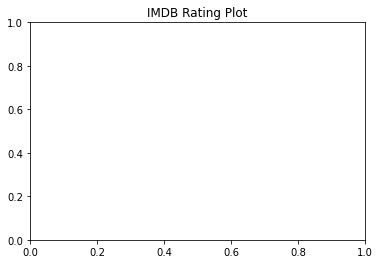

In [56]:

fig1, ax1 = plt.subplots()
ax1.set_title('IMDB Rating Plot')
ax1.boxplot(imdb_rating)